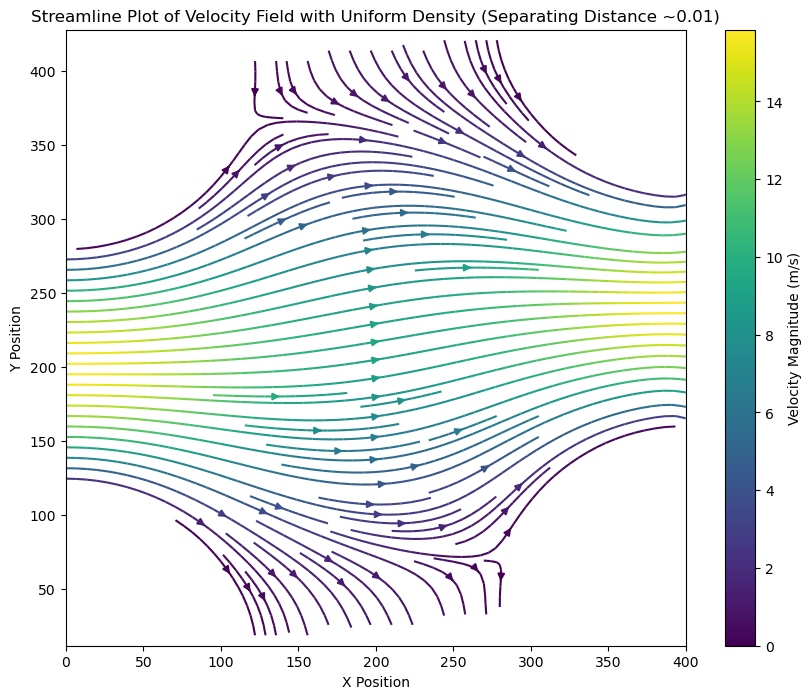

In [2]:
#original plot stline
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import pandas as pd

# Load your data
file_path = r"C:\Users\mahir\OneDrive\Desktop\Fieldpinc.csv"
velocity_field_data = pd.read_csv(file_path)

x = velocity_field_data['x'].values
y = velocity_field_data['y'].values
u = velocity_field_data['u1x (m/s) @ t=0.01'].values
v = velocity_field_data['u1y (m/s) @ t=0.01'].values

# Define a regular grid
x_range = np.linspace(x.min(), x.max(), 100)
y_range = np.linspace(y.min(), y.max(), 100)
X, Y = np.meshgrid(x_range, y_range)

# Interpolate
U = griddata((x, y), u, (X, Y), method='linear')
V = griddata((x, y), v, (X, Y), method='linear')

# Plot with density adjustments
plt.figure(figsize=(10, 8))
plt.streamplot(X, Y, U, V, color=np.sqrt(U**2 + V**2), cmap='viridis', density=2)
plt.title('Streamline Plot of Velocity Field with Uniform Density (Separating Distance ~0.01)')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.colorbar(label='Velocity Magnitude (m/s)')
plt.show()

Iteration 10: Position (x, y) = (5.43, 142.43)
Iteration 20: Position (x, y) = (10.85, 142.22)
Iteration 30: Position (x, y) = (16.23, 141.88)
Iteration 40: Position (x, y) = (21.55, 141.40)
Iteration 50: Position (x, y) = (26.80, 140.81)
Iteration 60: Position (x, y) = (31.95, 140.10)
Iteration 70: Position (x, y) = (37.00, 139.29)
Iteration 80: Position (x, y) = (41.95, 138.38)
Iteration 90: Position (x, y) = (46.79, 137.38)
Iteration 100: Position (x, y) = (51.50, 136.31)
Iteration 110: Position (x, y) = (56.07, 135.18)
Iteration 120: Position (x, y) = (60.52, 134.00)
Iteration 130: Position (x, y) = (64.83, 132.77)
Iteration 140: Position (x, y) = (69.01, 131.52)
Iteration 150: Position (x, y) = (73.07, 130.24)
Iteration 160: Position (x, y) = (77.01, 128.94)
Iteration 170: Position (x, y) = (80.82, 127.63)
Iteration 180: Position (x, y) = (84.52, 126.32)
Iteration 190: Position (x, y) = (88.11, 125.01)
Iteration 200: Position (x, y) = (91.60, 123.72)
Iteration 210: Position (x, y)

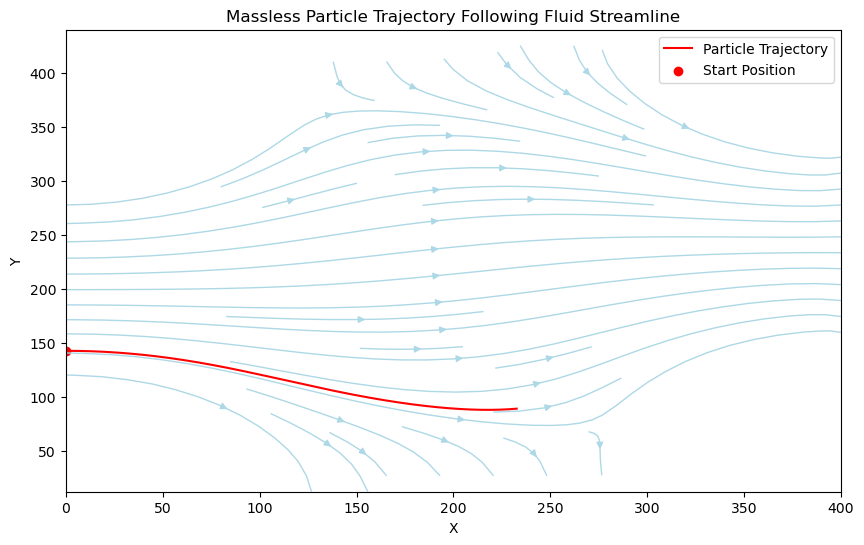

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import pandas as pd
import time

# Load your data
file_path = r"C:\Users\mahir\OneDrive\Desktop\Field.csv"
velocity_field_data = pd.read_csv(file_path)

x = velocity_field_data['x'].values
y = velocity_field_data['y'].values
u = velocity_field_data['u1x (m/s) @ t=0.01'].values
v = velocity_field_data['u1y (m/s) @ t=0.01'].values

# Define a regular grid
x_range = np.linspace(x.min(), x.max(), 100)
y_range = np.linspace(y.min(), 440, 100)
X, Y = np.meshgrid(x_range, y_range)

# Interpolate with linear method and handle NaNs
U = griddata((x, y), u, (X, Y), method='linear')
V = griddata((x, y), v, (X, Y), method='linear')

# Replace NaN values with zeros
U = np.nan_to_num(U)
V = np.nan_to_num(V)

# Normalize the velocity components
maxu = np.max(np.abs(U))
maxv = np.max(np.abs(V))
max_vel = max(maxu, maxv)
U_normalized = U / max_vel
V_normalized = V / max_vel

# Function for the velocity field at any point (x, y)
def velocity(x, y, U, V, X, Y):
    # Interpolate velocity at the particle's position
    u = griddata((X.flatten(), Y.flatten()), U.flatten(), (x, y), method='linear')
    v = griddata((X.flatten(), Y.flatten()), V.flatten(), (x, y), method='linear')
    return u, v

# RK4 method for particle trajectory
def rk4_step(x, y, dt, U, V, X, Y):
    # Calculate the four increments (k1, k2, k3, k4) for x and y

    # k1
    u1, v1 = velocity(x, y, U, V, X, Y)
    k1x = dt * u1
    k1y = dt * v1

    # k2
    u2, v2 = velocity(x + k1x / 2, y + k1y / 2, U, V, X, Y)
    k2x = dt * u2
    k2y = dt * v2

    # k3
    u3, v3 = velocity(x + k2x / 2, y + k2y / 2, U, V, X, Y)
    k3x = dt * u3
    k3y = dt * v3

    # k4
    u4, v4 = velocity(x + k3x, y + k3y, U, V, X, Y)
    k4x = dt * u4
    k4y = dt * v4

    # Combine increments to get the next position
    x_next = x + (k1x + 2 * k2x + 2 * k3x + k4x) / 6
    y_next = y + (k1y + 2 * k2y + 2 * k3y + k4y) / 6

    return x_next, y_next

# Initial position of the particle
x0, y0 = 0, 142.5  # Starting at x=0, y=142.5
dt = 1  # Time step
num_steps = 1000  # Number of steps for the particle's trajectory

# Lists to store the particle's trajectory
x_traj = [x0]
y_traj = [y0]

# Start timer for simulation
start_time = time.time()

# Simulate the particle trajectory
for i in range(num_steps):
    x_next, y_next = rk4_step(x_traj[-1], y_traj[-1], dt, U_normalized, V_normalized, X, Y)
    x_traj.append(x_next)
    y_traj.append(y_next)
    
    # Print position after every 10 iterations
    if (i + 1) % 10 == 0:
        print(f"Iteration {i + 1}: Position (x, y) = ({x_next:.2f}, {y_next:.2f})")

# End timer for simulation
end_time = time.time()
total_time = end_time - start_time
print(f"Total simulation time: {total_time:.2f} seconds")

# Plot the results
plt.figure(figsize=(10, 6))
plt.streamplot(X, Y, U_normalized, V_normalized, color='lightblue', linewidth=1)
plt.plot(x_traj, y_traj, 'r-', label='Particle Trajectory')
plt.scatter([x0], [y0], color='red', label='Start Position')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Massless Particle Trajectory Following Fluid Streamline')
plt.show()


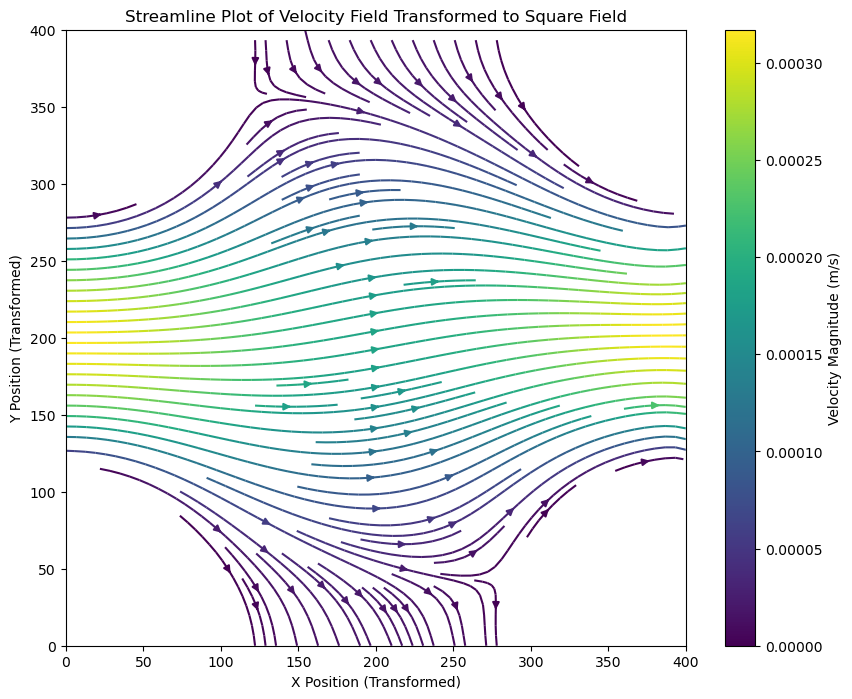

In [4]:
#original plot with sqr field
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import pandas as pd

# Load your data
file_path = r"C:\Users\mahir\OneDrive\Desktop\Field.csv"
velocity_field_data = pd.read_csv(file_path)

x = velocity_field_data['x'].values
y = velocity_field_data['y'].values
u = velocity_field_data['u1x (m/s) @ t=0.01'].values
v = velocity_field_data['u1y (m/s) @ t=0.01'].values

# Define the original parallelogram and target square points
parallelogram_points = np.array([[0, 0], [0, 400], [400, 40], [400, 440]])
square_points = np.array([[0, 0], [0, 400], [400, 0], [400, 400]])

# Calculate the affine transformation matrix
parallelogram_to_square = np.linalg.lstsq(parallelogram_points, square_points, rcond=None)[0]

# Apply the transformation to x, y coordinates
transformed_points = np.dot(np.c_[x, y], parallelogram_to_square)
x_transformed, y_transformed = transformed_points[:, 0], transformed_points[:, 1]

# Define a regular square grid
x_range_square = np.linspace(x_transformed.min(), x_transformed.max(), 100)
y_range_square = np.linspace(y_transformed.min(), y_transformed.max(), 100)
X_square, Y_square = np.meshgrid(x_range_square, y_range_square)

# Interpolate the velocity data onto the square grid
U_square = griddata((x_transformed, y_transformed), u, (X_square, Y_square), method='linear')
V_square = griddata((x_transformed, y_transformed), v, (X_square, Y_square), method='linear')

# Plot the streamline in the transformed square field
plt.figure(figsize=(10, 8))
plt.streamplot(X_square, Y_square, U_square, V_square, color=np.sqrt(U_square**2 + V_square**2), cmap='viridis', density=2)
plt.title('Streamline Plot of Velocity Field Transformed to Square Field')
plt.xlabel('X Position (Transformed)')
plt.ylabel('Y Position (Transformed)')
plt.colorbar(label='Velocity Magnitude (m/s)')
plt.show()


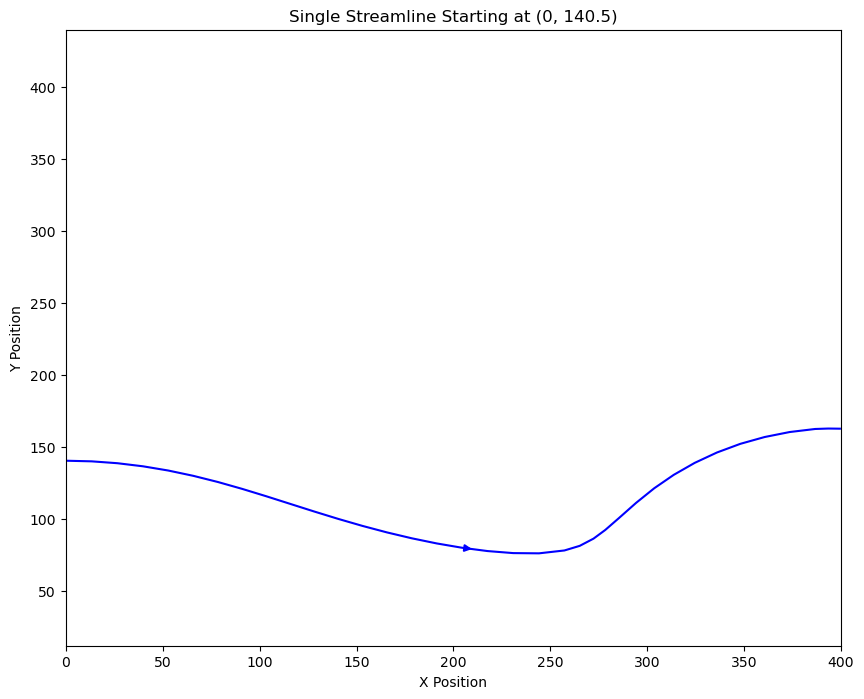

In [13]:
#single streamline with Paral+normalized
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import pandas as pd

# Load your data
file_path = r"C:\Users\mahir\OneDrive\Desktop\Field.csv"
velocity_field_data = pd.read_csv(file_path)

x = velocity_field_data['x'].values
y = velocity_field_data['y'].values
u = velocity_field_data['u1x (m/s) @ t=0.01'].values
v = velocity_field_data['u1y (m/s) @ t=0.01'].values

# Define a regular grid
x_range = np.linspace(x.min(), x.max(), 100)
y_range = np.linspace(y.min(), 440, 100)
X, Y = np.meshgrid(x_range, y_range)

# Interpolate with linear method and handle NaNs
U = griddata((x, y), u, (X, Y), method='linear')
V = griddata((x, y), v, (X, Y), method='linear')

# Replace NaN values with zeros
U = np.nan_to_num(U)
V = np.nan_to_num(V)

# Normalize the velocity components
maxu = np.max(np.abs(U))
maxv = np.max(np.abs(V))
max_vel = max(maxu, maxv)
U_normalized = U / max_vel
V_normalized = V / max_vel

# Define the start point for the single streamline
start_points = np.array([[0, 140.5]])

# Plot the single streamline
plt.figure(figsize=(10, 8))
plt.streamplot(X, Y, U_normalized, V_normalized, color='b', start_points=start_points, density=1)
plt.title('Single Streamline Starting at (0, 140.5)')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.xlim([X.min(), X.max()])
plt.ylim([Y.min(), 440])
plt.show()


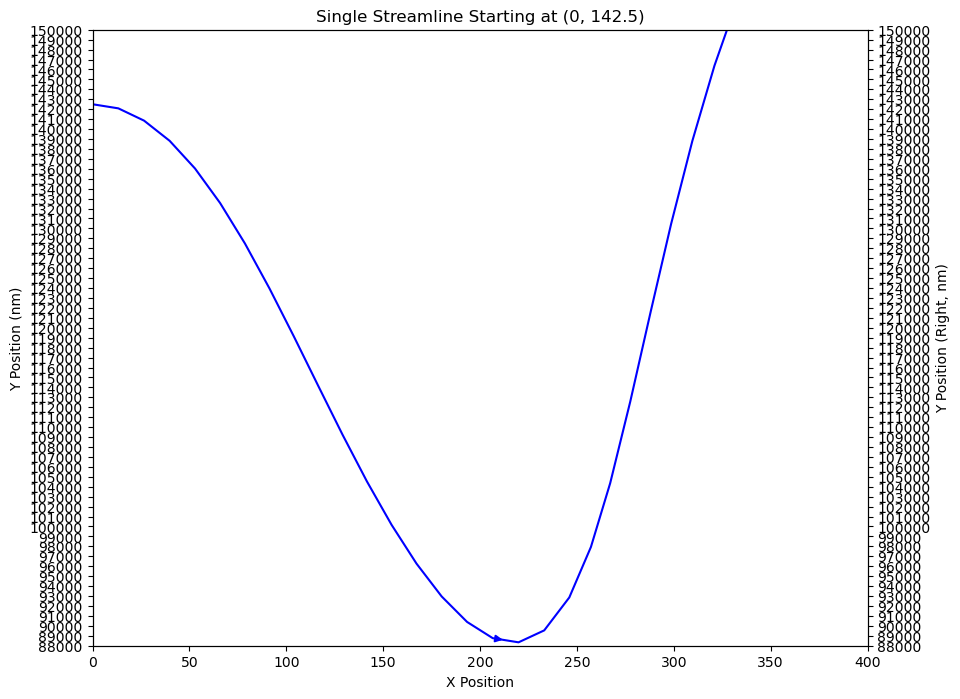

In [7]:
#single streamline with Paral+normalized magnified
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import pandas as pd

# Load your data
file_path = r"C:\Users\mahir\OneDrive\Desktop\Field.csv"
velocity_field_data = pd.read_csv(file_path)

x = velocity_field_data['x'].values
y = velocity_field_data['y'].values
u = velocity_field_data['u1x (m/s) @ t=0.01'].values
v = velocity_field_data['u1y (m/s) @ t=0.01'].values

# Create a grid to compute distances
x_range = np.linspace(0, 400, 100)
y_range = np.linspace(0, 440, 100)
X, Y = np.meshgrid(x_range, y_range)

# Interpolate with linear method and handle NaNs
U = griddata((x, y), u, (X, Y), method='linear')
V = griddata((x, y), v, (X, Y), method='linear')

# Replace NaN values with zeros
U = np.nan_to_num(U)
V = np.nan_to_num(V)

# Normalize the velocity components
maxu = np.max(np.abs(U))
maxv = np.max(np.abs(V))
max_vel = max(maxu, maxv)
U_normalized = U / max_vel
V_normalized = V / max_vel

start_points = np.array([[0, 142.5]])

# Plot the single streamline with restricted y-axis and a secondary y-axis
fig, ax = plt.subplots(figsize=(10, 8))

# Primary streamline plot
strm = ax.streamplot(X, Y, U_normalized, V_normalized, color='b', start_points=start_points, density=1)
ax.set_title('Single Streamline Starting at (0, 142.5)')
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position (nm)')
ax.set_xlim([X.min(), X.max()])
ax.set_ylim([88, 150])

# Convert y-axis ticks to nanometers (1000 times the original values)
y_ticks = np.arange(88, 151, 1)  # 1 µm steps
ax.set_yticks(y_ticks)
ax.set_yticklabels((y_ticks * 1000).astype(int))  # Convert to nm and display as integer

# Secondary y-axis
ax_secondary = ax.twinx()
ax_secondary.set_ylim([88, 150])
ax_secondary.set_ylabel('Y Position (Right, nm)')
ax_secondary.set_yticks(y_ticks)
ax_secondary.set_yticklabels((y_ticks * 1000).astype(int))  # Convert to nm and display as integer

plt.show()


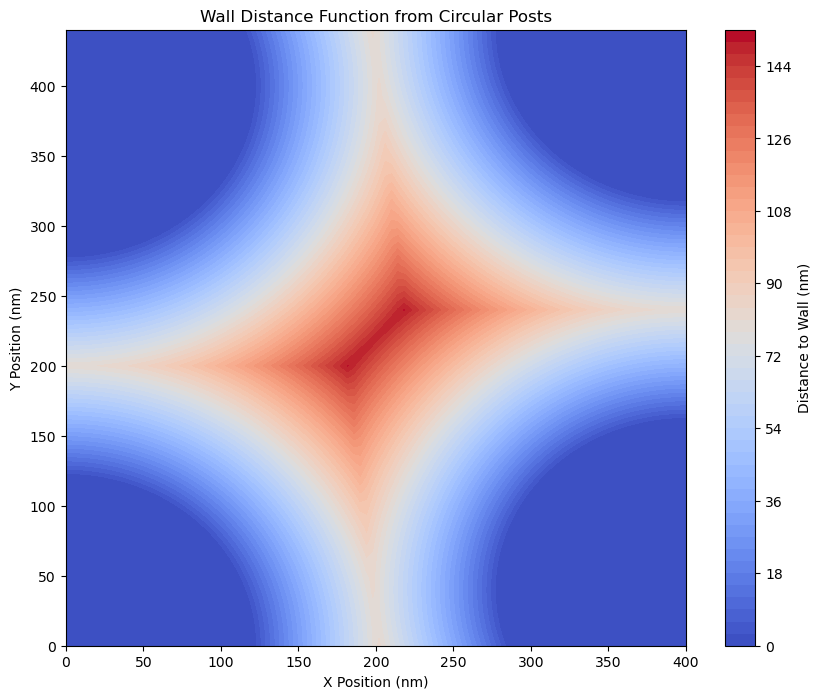

(100, 100)

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the centers and radius of the circular posts
centers = [(0, 0), (0, 400), (400, 40), (400, 440)]
radius = 120  # radius in nanometers

# Create a grid to compute distances
x_range = np.linspace(0, 400, 100)
y_range = np.linspace(0, 440, 100)
X, Y = np.meshgrid(x_range, y_range)

# Calculate the distance from each point in the grid to the nearest circular post
distances = np.full_like(X, np.inf, dtype=float)  # initialize with infinity

for cx, cy in centers:
    distance_to_post = np.sqrt((X - cx)**2 + (Y - cy)**2) - radius
    distances = np.minimum(distances, distance_to_post)  # take the minimum distance

# Set negative distances to zero
distances = np.maximum(distances, 0)

# Plot the wall distance function
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, distances, levels=50, cmap='coolwarm')
plt.colorbar(label='Distance to Wall (nm)')
plt.title('Wall Distance Function from Circular Posts')
plt.xlabel('X Position (nm)')
plt.ylabel('Y Position (nm)')
plt.show()
distances.shape

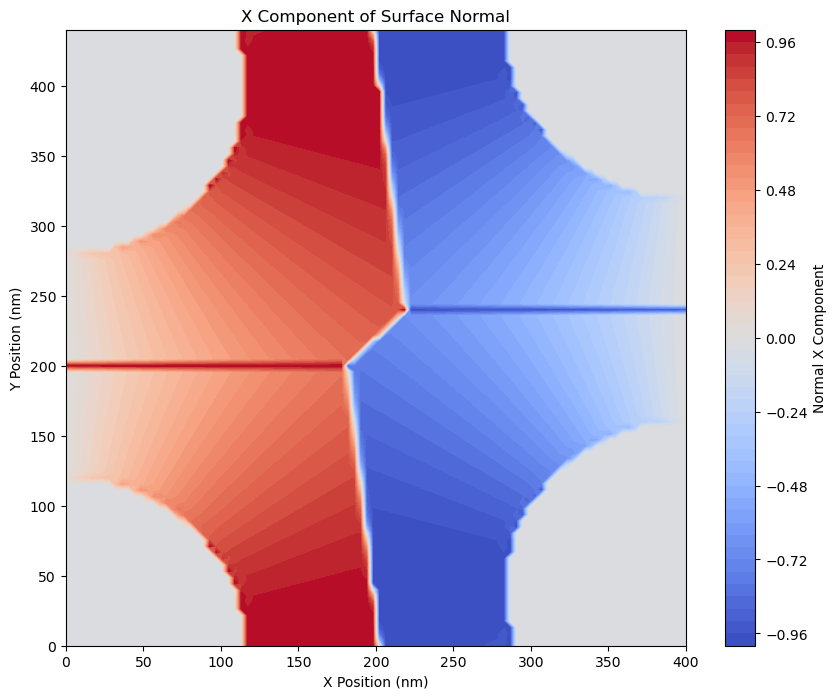

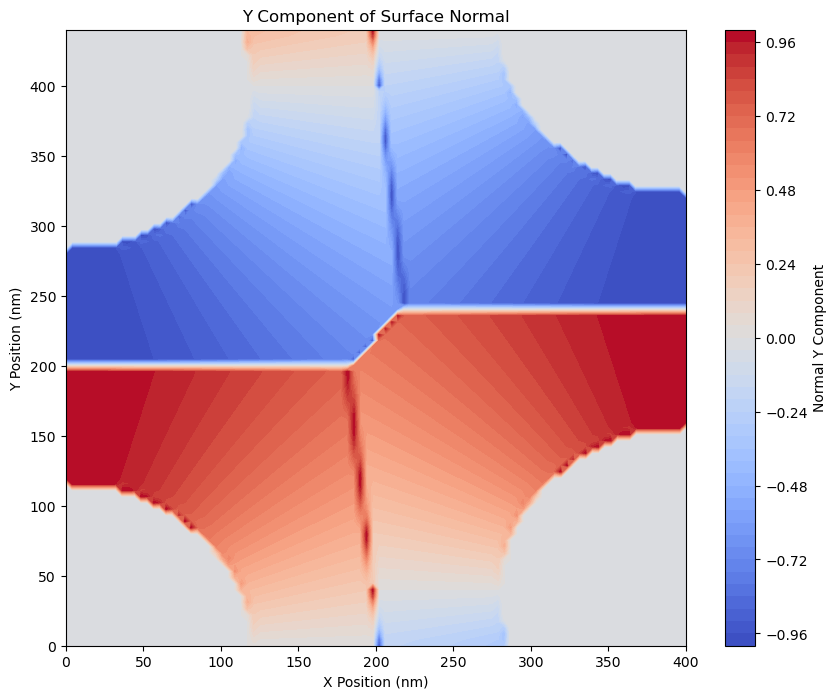

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the centers and radius of the circular posts
centers = [(0, 0), (0, 400), (400, 40), (400, 440)]
radius = 120  # radius in nanometers

# Create a grid to compute distances
x_range = np.linspace(0, 400, 100)
y_range = np.linspace(0, 440, 100)
X, Y = np.meshgrid(x_range, y_range)

# Calculate the distance from each point in the grid to the nearest circular post
distances = np.full_like(X, np.inf, dtype=float)  # initialize with infinity

for cx, cy in centers:
    distance_to_post = np.sqrt((X - cx)**2 + (Y - cy)**2) - radius
    distances = np.minimum(distances, distance_to_post)  # take the minimum distance

# Set negative distances to zero
distances = np.maximum(distances, 0)

# Calculate the gradient of the wall distance function
dy, dx = np.gradient(distances, y_range, x_range)

# Calculate the magnitude of the gradient (surface normal)
gradient_magnitude = np.sqrt(dx**2 + dy**2)

# Initialize normal_x and normal_y with zeros
normal_x = np.zeros_like(dx)
normal_y = np.zeros_like(dy)

# Avoid division by zero by normalizing only where gradient_magnitude is not zero
non_zero_magnitude = gradient_magnitude > 0
normal_x[non_zero_magnitude] = dx[non_zero_magnitude] / gradient_magnitude[non_zero_magnitude]
normal_y[non_zero_magnitude] = dy[non_zero_magnitude] / gradient_magnitude[non_zero_magnitude]

# Plot the x-component of the surface normal
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, normal_x, levels=50, cmap='coolwarm')
plt.colorbar(label='Normal X Component')
plt.title('X Component of Surface Normal')
plt.xlabel('X Position (nm)')
plt.ylabel('Y Position (nm)')
plt.show()

# Plot the y-component of the surface normal
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, normal_y, levels=50, cmap='coolwarm')
plt.colorbar(label='Normal Y Component')
plt.title('Y Component of Surface Normal')
plt.xlabel('X Position (nm)')
plt.ylabel('Y Position (nm)')
plt.show()


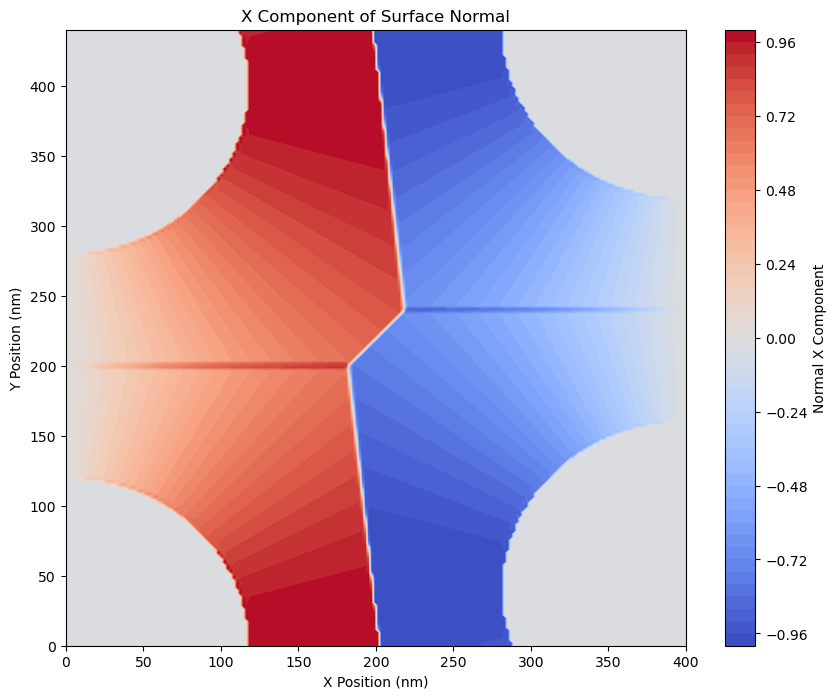

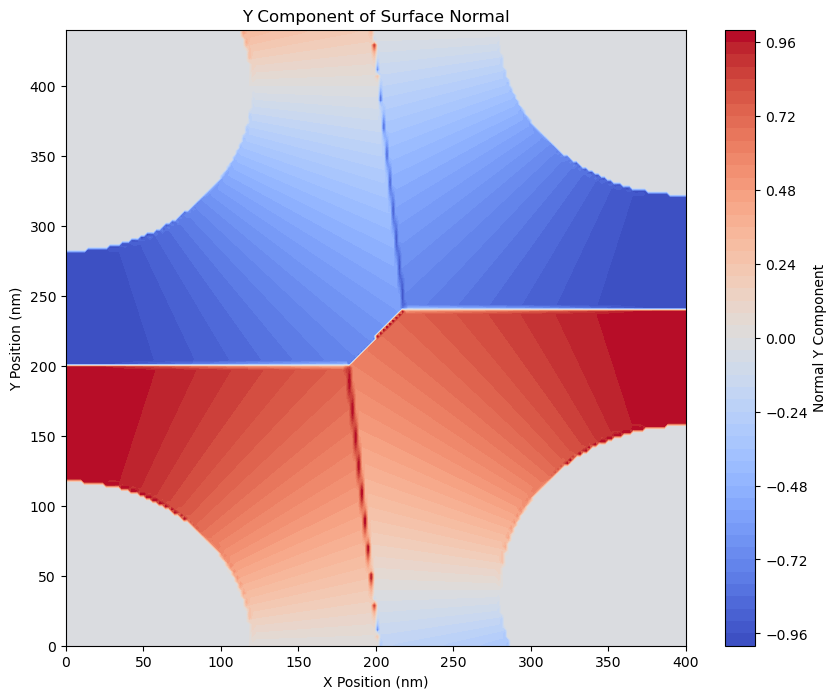

In [93]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import RegularGridInterpolator

# Define the centers and radius of the circular posts
centers = [(0, 0), (0, 400), (400, 40), (400, 440)]
radius = 120  # radius in nanometers

# Create a grid to compute distances
x_range = np.linspace(0, 400, 200)
y_range = np.linspace(0, 440, 200)
X, Y = np.meshgrid(x_range, y_range)

# Calculate the distance from each point in the grid to the nearest circular post
distances = np.full_like(X, np.inf, dtype=float)  # initialize with infinity

for cx, cy in centers:
    distance_to_post = np.sqrt((X - cx)**2 + (Y - cy)**2) - radius
    distances = np.minimum(distances, distance_to_post)  # take the minimum distance

# Set negative distances to zero
distances = np.maximum(distances, 0)

# Calculate the gradient of the wall distance function
dy, dx = np.gradient(distances, y_range, x_range)

# Calculate the magnitude of the gradient (surface normal)
gradient_magnitude = np.sqrt(dx**2 + dy**2)

# Initialize normal_x and normal_y with zeros
normal_x = np.zeros_like(dx)
normal_y = np.zeros_like(dy)

# Avoid division by zero by normalizing only where gradient_magnitude is not zero
non_zero_magnitude = gradient_magnitude > 0
normal_x[non_zero_magnitude] = dx[non_zero_magnitude] / gradient_magnitude[non_zero_magnitude]
normal_y[non_zero_magnitude] = dy[non_zero_magnitude] / gradient_magnitude[non_zero_magnitude]

# Define interpolators for the normal components
normal_x_interpolator = RegularGridInterpolator((y_range, x_range), normal_x)
normal_y_interpolator = RegularGridInterpolator((y_range, x_range), normal_y)

# Interpolate the normal components over the grid (optional, for smoothness)
normal_x_interp = np.array([normal_x_interpolator((yi, xi)) for xi, yi in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
normal_y_interp = np.array([normal_y_interpolator((yi, xi)) for xi, yi in zip(X.ravel(), Y.ravel())]).reshape(X.shape)

# Plot the x-component of the surface normal
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, normal_x_interp, levels=50, cmap='coolwarm')
plt.colorbar(label='Normal X Component')
plt.title('X Component of Surface Normal')
plt.xlabel('X Position (nm)')
plt.ylabel('Y Position (nm)')
plt.show()

# Plot the y-component of the surface normal
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, normal_y_interp, levels=50, cmap='coolwarm')
plt.colorbar(label='Normal Y Component')
plt.title('Y Component of Surface Normal')
plt.xlabel('X Position (nm)')
plt.ylabel('Y Position (nm)')
plt.show()


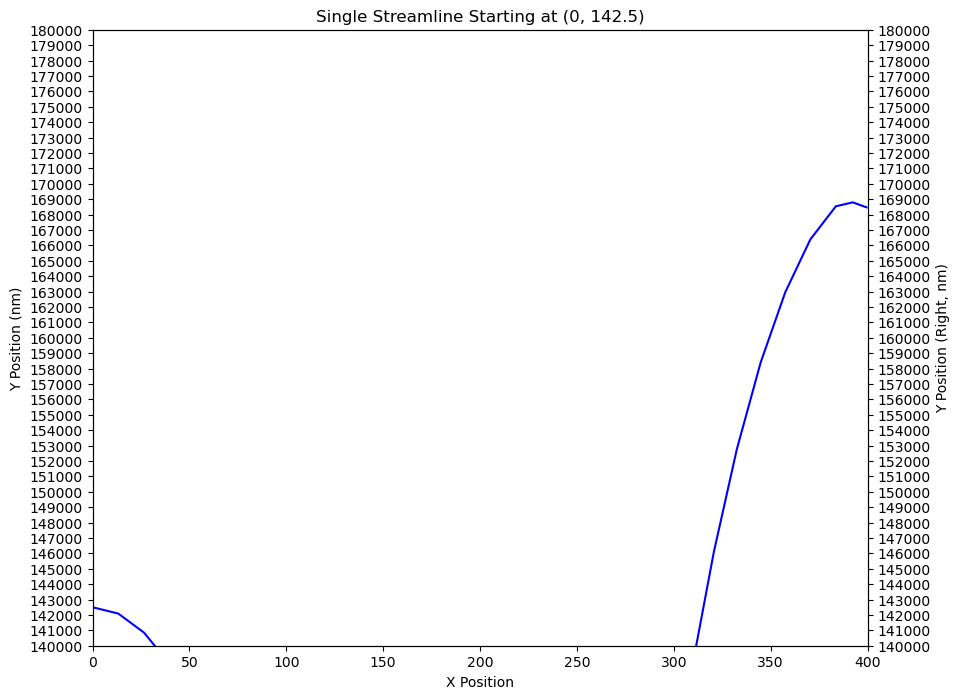

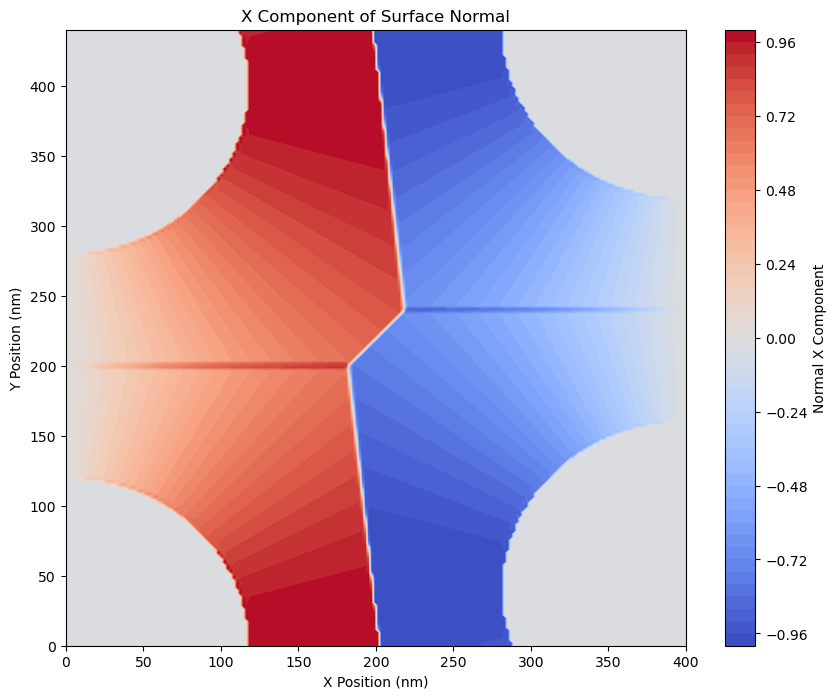

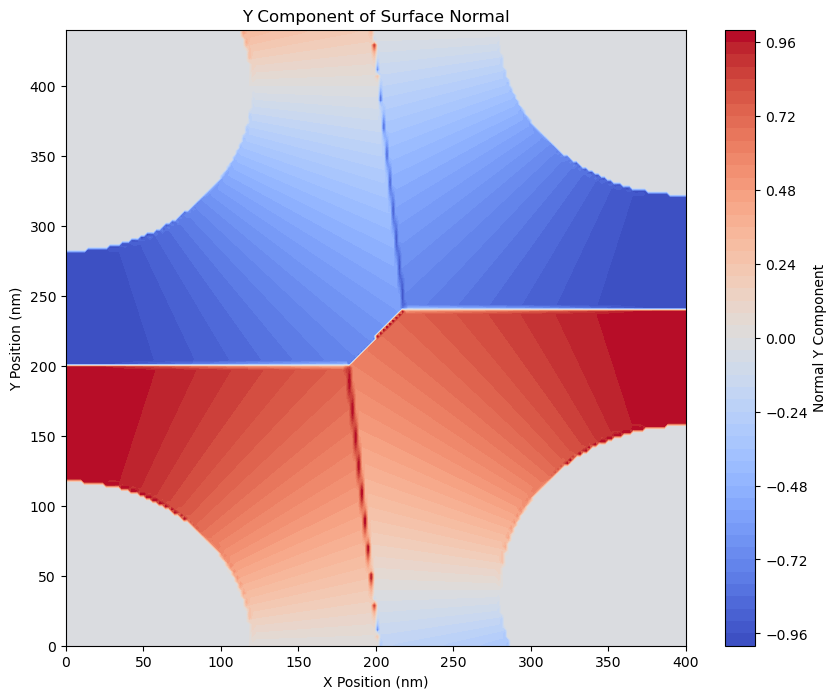

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import RegularGridInterpolator, griddata

# Load velocity field data
file_path = r"C:\Users\mahir\OneDrive\Desktop\Field.csv"
velocity_field_data = pd.read_csv(file_path)

x = velocity_field_data['x'].values
y = velocity_field_data['y'].values
u = velocity_field_data['u1x (m/s) @ t=0.01'].values
v = velocity_field_data['u1y (m/s) @ t=0.01'].values

# Define grid resolution
x_range = np.linspace(0, 400, 200)
y_range = np.linspace(0, 440, 200)
X, Y = np.meshgrid(x_range, y_range)

# Interpolate velocity field data to regular grid
U_grid = griddata((x, y), u, (X, Y), method='linear')
V_grid = griddata((x, y), v, (X, Y), method='linear')

# Handle NaNs in interpolated data
U_grid = np.nan_to_num(U_grid)
V_grid = np.nan_to_num(V_grid)

# Normalize the velocity components
max_vel = max(np.max(np.abs(U_grid)), np.max(np.abs(V_grid)))
U_normalized = U_grid / max_vel
V_normalized = V_grid / max_vel

# Define interpolators for the normalized velocity components
u_interpolator = RegularGridInterpolator((y_range, x_range), U_normalized)
v_interpolator = RegularGridInterpolator((y_range, x_range), V_normalized)

# Recalculate the normalized velocity field over the regular grid
U = np.array([u_interpolator((yi, xi)) for xi, yi in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
V = np.array([v_interpolator((yi, xi)) for xi, yi in zip(X.ravel(), Y.ravel())]).reshape(X.shape)

# Start point for the streamline
start_points = np.array([[0, 142.5]])

# Define the centers and radius of the circular posts
centers = [(0, 0), (0, 400), (400, 40), (400, 440)]
radius = 120  # radius in nanometers

# Calculate the distance from each point in the grid to the nearest circular post
distances = np.full_like(X, np.inf, dtype=float)  # initialize with infinity

for cx, cy in centers:
    distance_to_post = np.sqrt((X - cx)**2 + (Y - cy)**2) - radius
    distances = np.minimum(distances, distance_to_post)  # take the minimum distance

# Set negative distances to zero
distances = np.maximum(distances, 0)

# Calculate the gradient of the wall distance function
dy, dx = np.gradient(distances, y_range, x_range)

# Calculate the magnitude of the gradient (surface normal)
gradient_magnitude = np.sqrt(dx**2 + dy**2)

# Calculate normalized surface normal components
normal_x = np.zeros_like(dx)
normal_y = np.zeros_like(dy)
non_zero_magnitude = gradient_magnitude > 0
normal_x[non_zero_magnitude] = dx[non_zero_magnitude] / gradient_magnitude[non_zero_magnitude]
normal_y[non_zero_magnitude] = dy[non_zero_magnitude] / gradient_magnitude[non_zero_magnitude]

# Define interpolators for the normal components
normal_x_interpolator = RegularGridInterpolator((y_range, x_range), normal_x)
normal_y_interpolator = RegularGridInterpolator((y_range, x_range), normal_y)

# Interpolate the normal components over the grid for smoothness
normal_x_interp = np.array([normal_x_interpolator((yi, xi)) for xi, yi in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
normal_y_interp = np.array([normal_y_interpolator((yi, xi)) for xi, yi in zip(X.ravel(), Y.ravel())]).reshape(X.shape)

# Plot the single streamline with restricted y-axis and a secondary y-axis
fig, ax = plt.subplots(figsize=(10, 8))
strm = ax.streamplot(X, Y, U, V, color='b', start_points=start_points, density=1)
ax.set_title('Single Streamline Starting at (0, 142.5)')
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position (nm)')
ax.set_xlim([X.min(), X.max()])
ax.set_ylim([140, 180])

# Convert y-axis ticks to nanometers
y_ticks = np.arange(140, 181, 1)
ax.set_yticks(y_ticks)
ax.set_yticklabels((y_ticks * 1000).astype(int))

# Secondary y-axis for nanometers
ax_secondary = ax.twinx()
ax_secondary.set_ylim([140, 180])
ax_secondary.set_ylabel('Y Position (Right, nm)')
ax_secondary.set_yticks(y_ticks)
ax_secondary.set_yticklabels((y_ticks * 1000).astype(int))

plt.show()

# Plot the x-component of the surface normal
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, normal_x_interp, levels=50, cmap='coolwarm')
plt.colorbar(label='Normal X Component')
plt.title('X Component of Surface Normal')
plt.xlabel('X Position (nm)')
plt.ylabel('Y Position (nm)')
plt.show()

# Plot the y-component of the surface normal
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, normal_y_interp, levels=50, cmap='coolwarm')
plt.colorbar(label='Normal Y Component')
plt.title('Y Component of Surface Normal')
plt.xlabel('X Position (nm)')
plt.ylabel('Y Position (nm)')
plt.show()


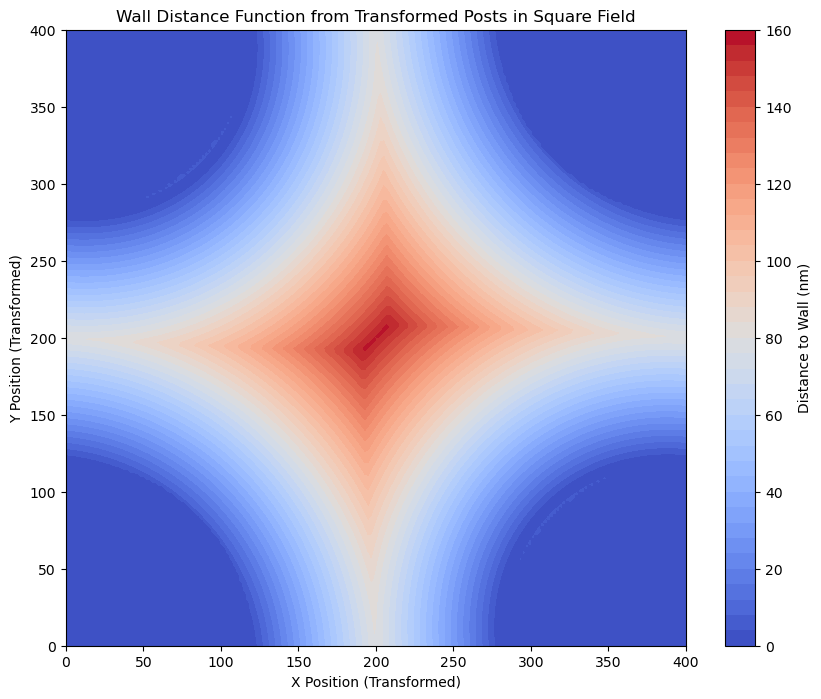

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for posts in the original parallelogram field
original_centers = [(0, 0), (0, 400), (400, 40), (400, 440)]
radius = 120  # radius in nanometers

# Define the original parallelogram and square points for transformation
parallelogram_points = np.array([[0, 0], [0, 400], [400, 40], [400, 440]])
square_points = np.array([[0, 0], [0, 400], [400, 0], [400, 400]])

# Calculate the affine transformation matrix
parallelogram_to_square = np.linalg.lstsq(parallelogram_points, square_points, rcond=None)[0]

# Apply the transformation to post centers
transformed_centers = [np.dot(center, parallelogram_to_square) for center in original_centers]

# Create a grid to compute distances
x_range = np.linspace(0, 400, 200)
y_range = np.linspace(0, 400, 200)
X, Y = np.meshgrid(x_range, y_range)

# Prepare to calculate wall distances
boundary_distances = []
angle_range = np.linspace(0, 2 * np.pi, 500)

# Calculate distances to the transformed posts
for cx, cy in original_centers:
    # Create boundary points around each post center
    boundary_points = np.array([cx + radius * np.cos(angle_range),
                                cy + radius * np.sin(angle_range)]).T
    
    # Transform boundary points to the square field
    transformed_boundary_points = np.dot(boundary_points, parallelogram_to_square)

    # Calculate minimum distance from each grid point to transformed boundary points
    distances_to_boundary = np.full(X.shape, np.inf, dtype=float)
    for bx, by in transformed_boundary_points:
        distance_to_point = np.sqrt((X - bx)**2 + (Y - by)**2)
        distances_to_boundary = np.minimum(distances_to_boundary, distance_to_point)
        
    boundary_distances.append(distances_to_boundary)

# Calculate wall distances as the minimum distance to any post boundary
wall_distances = np.minimum.reduce(boundary_distances)

# Set distances inside each post to zero
for cx, cy in transformed_centers:
    inside_post = (X - cx)**2 + (Y - cy)**2 < radius**2
    wall_distances[inside_post] = 0

# Plot the wall distance function
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, wall_distances, levels=50, cmap='coolwarm')
plt.colorbar(label='Distance to Wall (nm)')
plt.title('Wall Distance Function from Transformed Posts in Square Field')
plt.xlabel('X Position (Transformed)')
plt.ylabel('Y Position (Transformed)')
plt.show()


C:\Users\mahir\AppData\Local\Temp\ipykernel_13912\2909120916.py:55: RuntimeWarning: invalid value encountered in divide
  nx, ny = dx / norm_magnitude, dy / norm_magnitude  # Normalized normal vectors


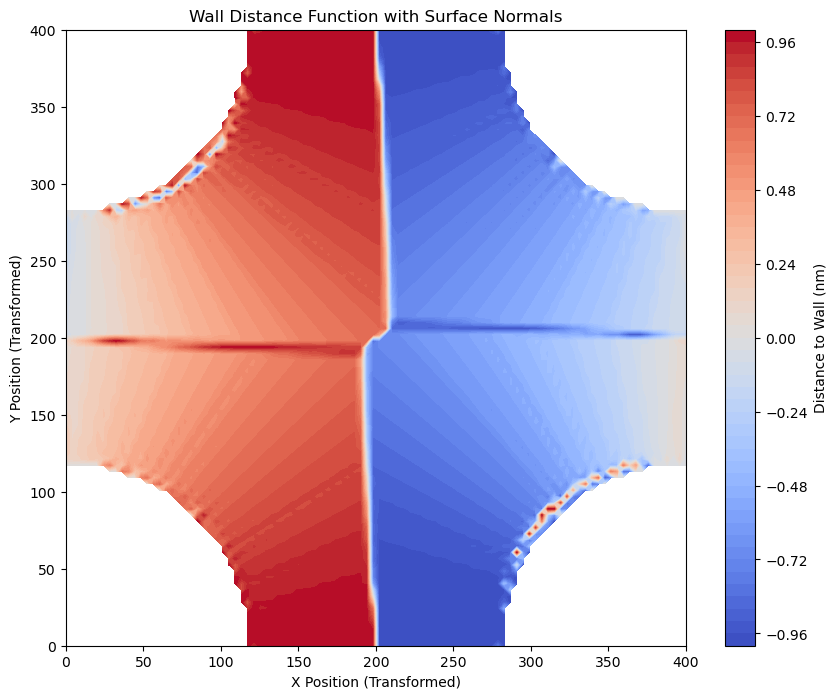

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for posts in the original parallelogram field
original_centers = [(0, 0), (0, 400), (400, 40), (400, 440)]
radius = 120  # radius in nanometers

# Define the original parallelogram and square points for transformation
parallelogram_points = np.array([[0, 0], [0, 400], [400, 40], [400, 440]])
square_points = np.array([[0, 0], [0, 400], [400, 0], [400, 400]])

# Calculate the affine transformation matrix
parallelogram_to_square = np.linalg.lstsq(parallelogram_points, square_points, rcond=None)[0]

# Apply the transformation to post centers
transformed_centers = [np.dot(center, parallelogram_to_square) for center in original_centers]

# Create a grid to compute distances
x_range = np.linspace(0, 400, 100)
y_range = np.linspace(0, 400, 100)
X, Y = np.meshgrid(x_range, y_range)

# Prepare to calculate wall distances
boundary_distances = []
angle_range = np.linspace(0, 2 * np.pi, 100)

# Calculate distances to the transformed posts
for cx, cy in original_centers:
    # Create boundary points around each post center
    boundary_points = np.array([cx + radius * np.cos(angle_range),
                                cy + radius * np.sin(angle_range)]).T
    
    # Transform boundary points to the square field
    transformed_boundary_points = np.dot(boundary_points, parallelogram_to_square)

    # Calculate minimum distance from each grid point to transformed boundary points
    distances_to_boundary = np.full(X.shape, np.inf, dtype=float)
    for bx, by in transformed_boundary_points:
        distance_to_point = np.sqrt((X - bx)**2 + (Y - by)**2)
        distances_to_boundary = np.minimum(distances_to_boundary, distance_to_point)
        
    boundary_distances.append(distances_to_boundary)

# Calculate wall distances as the minimum distance to any post boundary
wall_distances = np.minimum.reduce(boundary_distances)

# Set distances inside each post to zero
for cx, cy in transformed_centers:
    inside_post = (X - cx)**2 + (Y - cy)**2 < radius**2
    wall_distances[inside_post] = 0

# Calculate surface normal by computing the gradient of wall distances
dy, dx = np.gradient(wall_distances, y_range, x_range)
norm_magnitude = np.sqrt(dx**2 + dy**2)
nx, ny = dx / norm_magnitude, dy / norm_magnitude  # Normalized normal vectors

# Plot the wall distance function and overlay surface normals as arrows
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, nx, levels=50, cmap='coolwarm')
plt.colorbar(label='Distance to Wall (nm)')
plt.title('Wall Distance Function with Surface Normals')
plt.xlabel('X Position (Transformed)')
plt.ylabel('Y Position (Transformed)')
plt.show()
